In [ ]:
import time
import pandas as pd
import datetime
import numpy as np
#API
import requests
#plot
import matplotlib.pyplot as plt
#density plot
from scipy.stats import gaussian_kde
import seaborn as sns


In [ ]:
#get latitude and longitude of weather stations
# importing geopy library
from geopy.geocoders import Nominatim
 
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# download and preproces crime dataset

In [ ]:
import os
li=[]
for root, dirs, files  in os.walk('/content/drive/MyDrive/'):
  for file in files:
    df = pd.read_csv(os.path.join(root, file), index_col=None, header=0)
    li.append(df)
    
df_main=pd.concat(li, axis=0, ignore_index=True)


In [ ]:
df=df_main.sample(int(len(df_main)/10),random_state=42).reset_index(drop=True).copy()
df=df[df["Month"]!="2019-05"]
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,af1ce12c430765a7017dbe42ebfa59490c782ff5213eb8...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-3.376110,51.117674,On or near Pit Lane,E01029335,West Somerset 004B,Criminal damage and arson,Unable to prosecute suspect,NaN
1,b5d81321d92febae436a9f890e9e7ad82624b4dc526f91...,2019-06,Metropolitan Police Service,Metropolitan Police Service,-0.145107,51.515111,On or near Shopping Area,E01004765,Westminster 013D,Theft from the person,Status update unavailable,NaN
2,NaN,2019-09,Kent Police,Kent Police,0.352396,51.428458,On or near Greenhill Road,E01024263,Gravesham 004B,Anti-social behaviour,NaN,NaN
3,c41efdf713d0620010f9249933907931a5068e83fe7562...,2019-11,Durham Constabulary,Durham Constabulary,-1.550117,54.527736,On or near Russell Street,E01033483,Darlington 008E,Vehicle crime,Investigation complete; no suspect identified,NaN
4,dc7c6db6ca8fae2a6cec45551f1f225178617602a801e1...,2019-10,Metropolitan Police Service,Metropolitan Police Service,-0.108868,51.562211,On or near Coleridge Road,E01002734,Islington 005B,Violence and sexual offences,Court result unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
695482,NaN,2020-01,Lancashire Constabulary,Lancashire Constabulary,-3.052629,53.836939,On or near Northumberland Avenue,E01012749,Blackpool 006D,Anti-social behaviour,NaN,NaN
695483,d37a51defd49e750ea800a57a66d988d14e51ba43c1394...,2020-05,Surrey Police,Surrey Police,-0.228465,51.312089,On or near Shawley Crescent,E01030642,Reigate and Banstead 003C,Violence and sexual offences,Unable to prosecute suspect,NaN
695484,d4f266149f7e9c976c843c2bf9941d269614b46c3cad48...,2020-02,North Wales Police,North Wales Police,-3.834618,53.323126,On or near Clifton Road,W01000146,Conwy 001B,Burglary,Unable to prosecute suspect,NaN
695485,fd748e4be7bc77532effbf759f11140687e4f9a717e0a5...,2019-11,Thames Valley Police,Thames Valley Police,-0.732479,51.509197,On or near Petrol Station,E01016594,Windsor and Maidenhead 007E,Other theft,Investigation complete; no suspect identified,NaN


In [ ]:
!pip install missingno


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


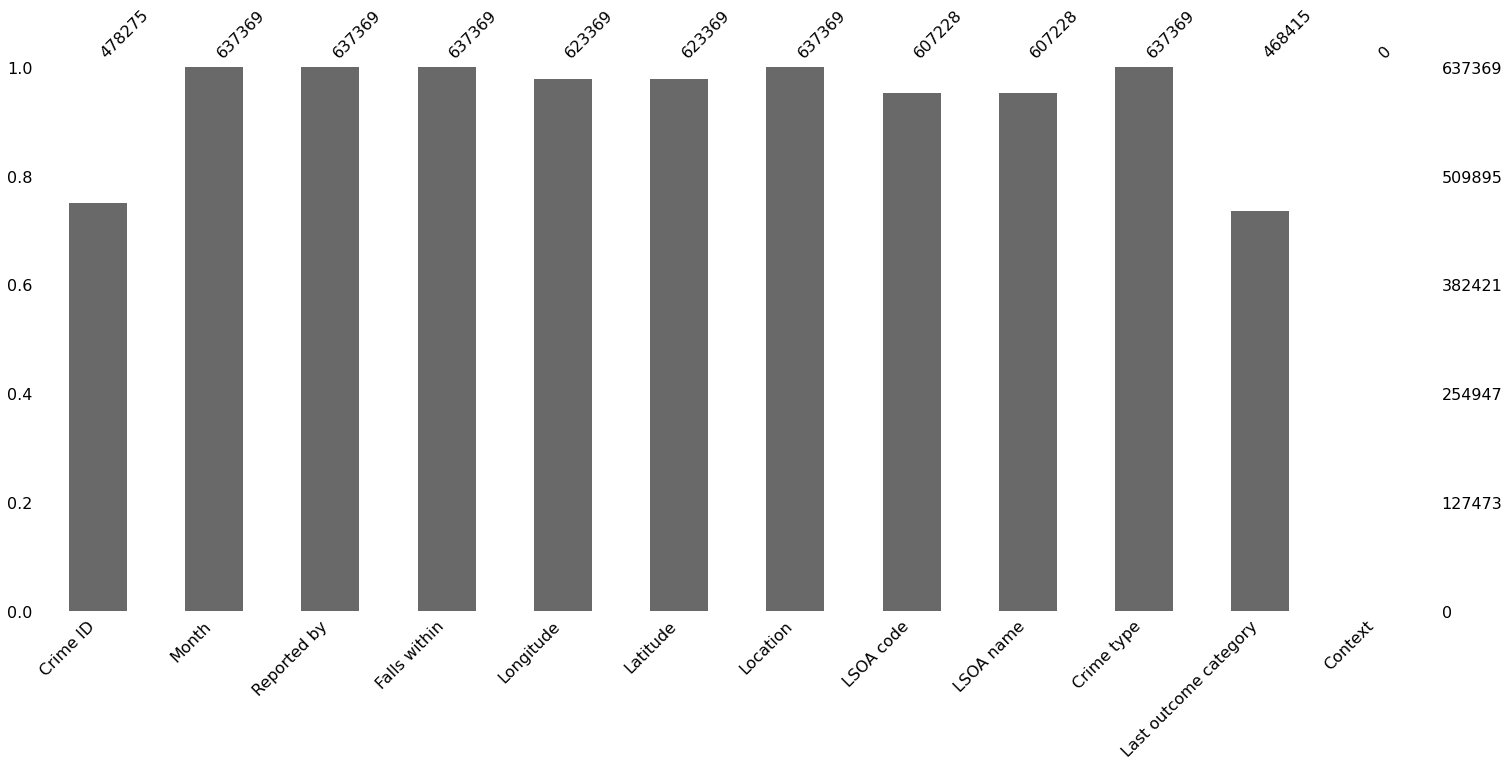

In [ ]:
#Check nan values 
import missingno as msno
msno.bar(df)


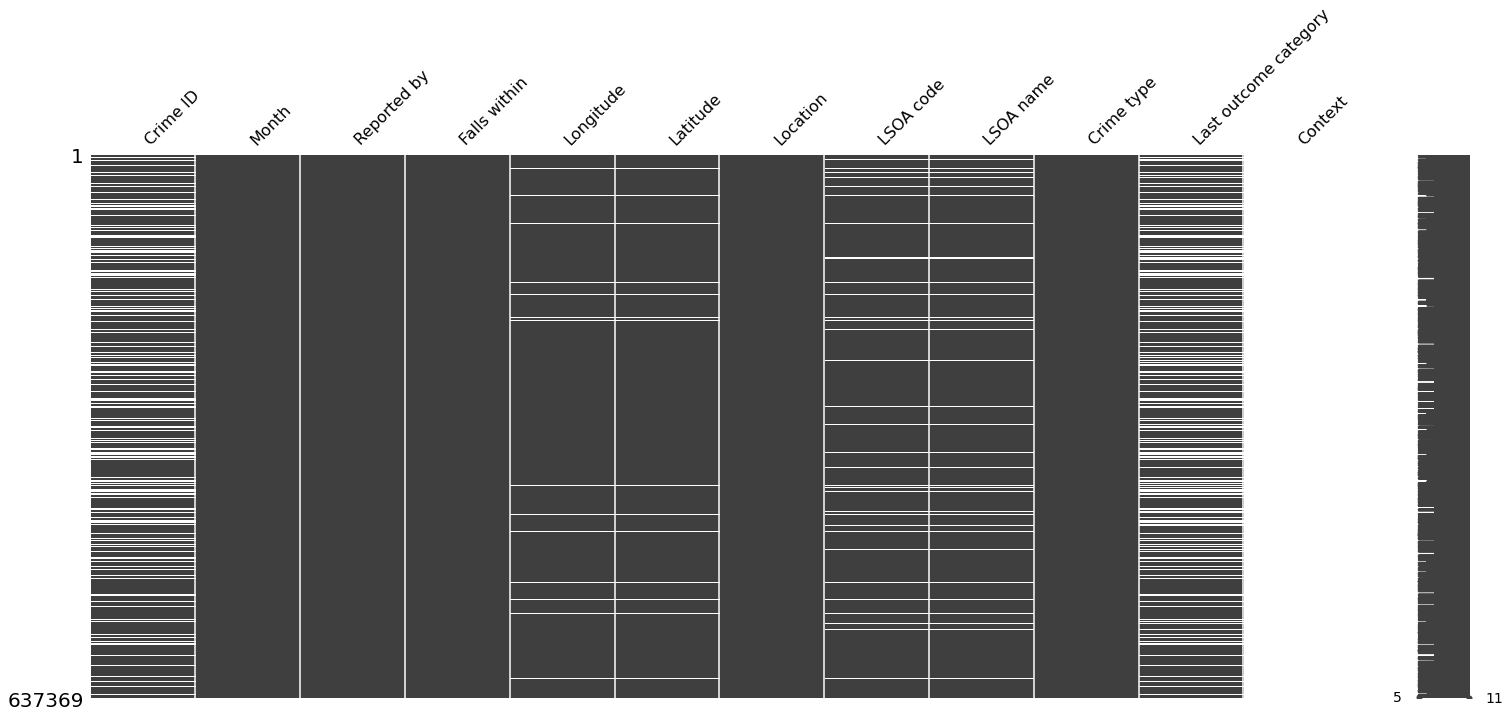

In [ ]:
msno.matrix(df)


In [ ]:
#drop tech or zero columns 
df=df.drop(["Crime ID",'Reported by',"LSOA code","LSOA name",'Last outcome category','Context'],axis=1)


In [ ]:
#drop crimes without location
df=df.dropna().reset_index(drop=True)


In [ ]:
df.columns=[x.replace(" ", "_").lower() for x in df.columns.to_list()]
df

,month,falls_within,longitude,latitude,location,crime_type
0,2020-01,Avon and Somerset Constabulary,-3.376110,51.117674,On or near Pit Lane,Criminal damage and arson
1,2019-06,Metropolitan Police Service,-0.145107,51.515111,On or near Shopping Area,Theft from the person
2,2019-09,Kent Police,0.352396,51.428458,On or near Greenhill Road,Anti-social behaviour
3,2019-11,Durham Constabulary,-1.550117,54.527736,On or near Russell Street,Vehicle crime
4,2019-10,Metropolitan Police Service,-0.108868,51.562211,On or near Coleridge Road,Violence and sexual offences
...,...,...,...,...,...,...
623364,2020-01,Lancashire Constabulary,-3.052629,53.836939,On or near Northumberland Avenue,Anti-social behaviour
623365,2020-05,Surrey Police,-0.228465,51.312089,On or near Shawley Crescent,Violence and sexual offences
623366,2020-02,North Wales Police,-3.834618,53.323126,On or near Clifton Road,Burglary
623367,2019-11,Thames Valley Police,-0.732479,51.509197,On or near Petrol Station,Other theft


In [ ]:
df["year_month"]=pd.to_datetime(df["month"], format='%Y-%m')

# download and preproces weather dataset

In [ ]:
weather_df=pd.read_csv("/content/drive/MyDrive/weather_archive/MET Office Weather Data.csv",)


In [ ]:
weather_df

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,NaN,74.7,NaN,aberporth
1,1941.0,2.0,NaN,NaN,NaN,69.1,NaN,aberporth
2,1941.0,3.0,NaN,NaN,NaN,76.2,NaN,aberporth
3,1941.0,4.0,NaN,NaN,NaN,33.7,NaN,aberporth
4,1941.0,5.0,NaN,NaN,NaN,51.3,NaN,aberporth
...,...,...,...,...,...,...,...,...
37044,2020.0,2.0,10.8,4.5,2.0,117.4,63.1,yeovilton
37045,2020.0,3.0,11.5,3.0,6.0,43.4,159.2,yeovilton
37046,2020.0,4.0,17.5,5.3,3.0,39.8,235.0,yeovilton
37047,2020.0,5.0,19.7,6.8,2.0,3.6,305.6,yeovilton


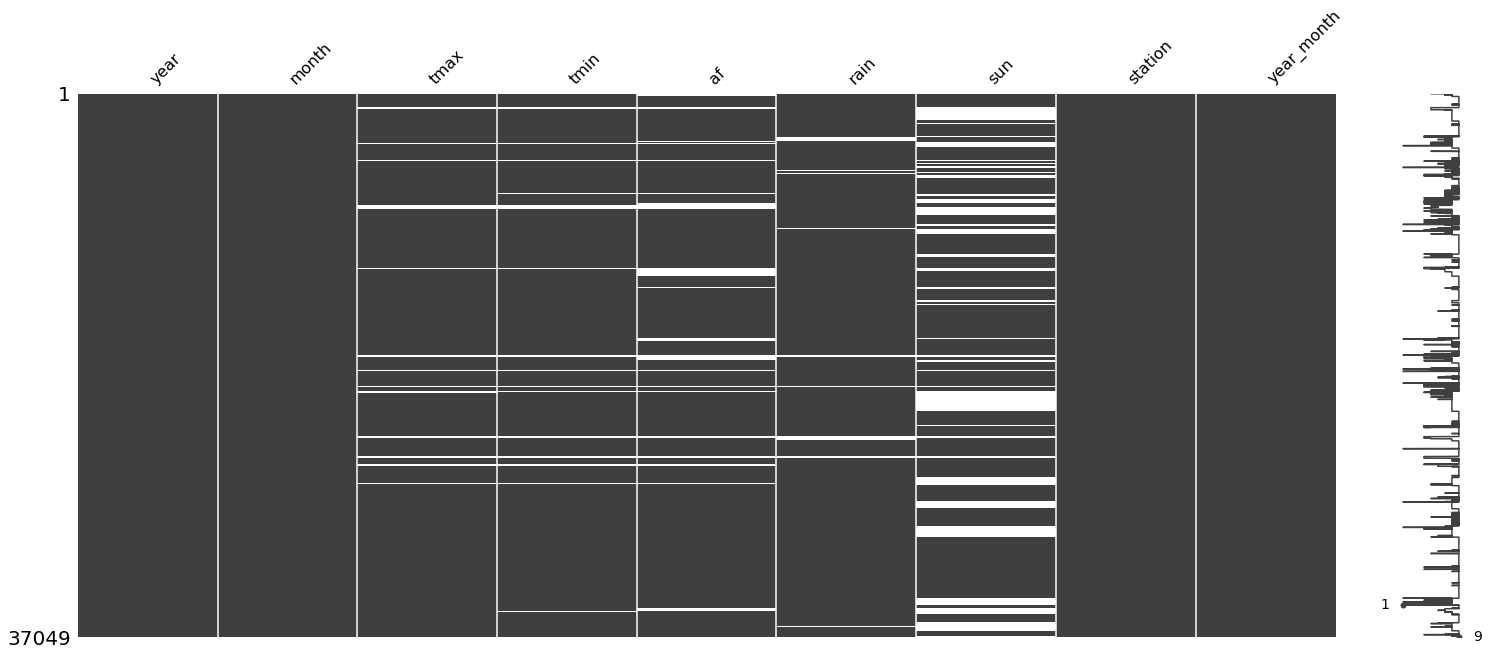

In [ ]:
weather_df["year_month"]=pd.to_datetime(weather_df['year'].dropna().astype(int).astype(str)+"-"+weather_df['month'].fillna(0).astype(int).astype(str), format='%Y-%m')
msno.matrix(weather_df)

In [ ]:
#https://weatherspark.com/y/33958/Average-Weather-in-Armagh-United-Kingdom-Year-Round
#nan values in sun columns coresponds to clody month or 
#the same correspons to the rain
weather_df.loc[weather_df["sun"].isna(),"sun"]=0
weather_df.loc[weather_df["rain"].isna(),"rain"]=0

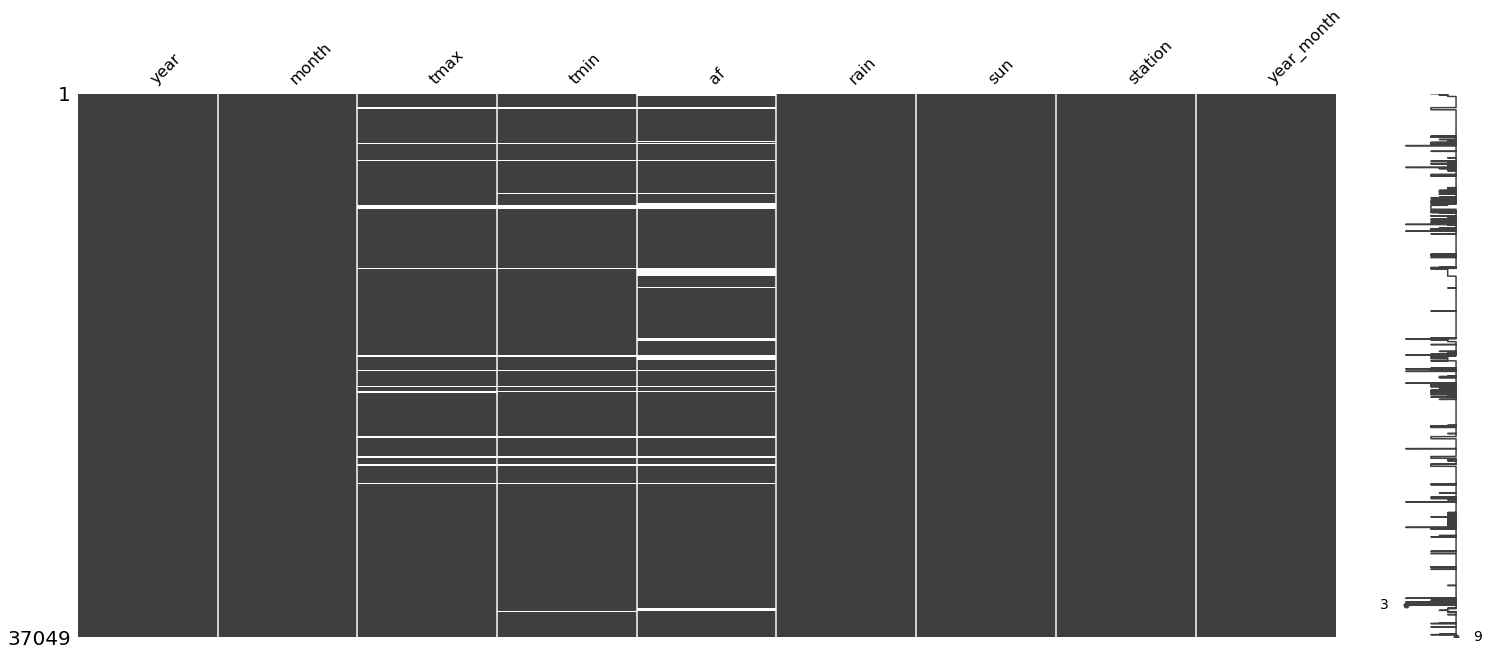

In [ ]:
msno.matrix(weather_df)

In [ ]:
weather_df[weather_df.isna().any(axis=1)]


,year,month,tmax,tmin,af,rain,sun,station,year_month
0,1941.0,1.0,NaN,NaN,NaN,74.7,0.0,aberporth,1941-01-01
1,1941.0,2.0,NaN,NaN,NaN,69.1,0.0,aberporth,1941-02-01
2,1941.0,3.0,NaN,NaN,NaN,76.2,0.0,aberporth,1941-03-01
3,1941.0,4.0,NaN,NaN,NaN,33.7,0.0,aberporth,1941-04-01
4,1941.0,5.0,NaN,NaN,NaN,51.3,0.0,aberporth,1941-05-01
...,...,...,...,...,...,...,...,...,...
36093,1996.0,9.0,14.5,NaN,NaN,35.6,0.0,wickairport,1996-09-01
36110,1998.0,2.0,NaN,NaN,NaN,87.9,0.0,wickairport,1998-02-01
36355,2018.0,7.0,NaN,NaN,NaN,57.6,0.0,wickairport,2018-07-01
36845,2003.0,7.0,22.1,NaN,NaN,70.0,156.6,yeovilton,2003-07-01


In [ ]:
#mean values by each month and station in 10 years
weather_deacade=weather_df[weather_df.year>2009].groupby(["month","station"]).mean().drop(["year"],axis=1)
weather_deacade

tmax      tmin         af        rain        sun
month station                                                           
1.0   aberporth     7.663636  3.563636   3.363636   95.790909  51.318182
      armagh        7.580000  1.910000   7.900000   70.445455  41.263636
      ballypatrick  6.727273  2.381818   5.000000  139.127273   0.000000
      bradford      6.472727  1.800000   9.363636   83.281818  16.400000
      braemar       4.527273 -1.545455  17.636364   97.454545   0.000000
...                      ...       ...        ...         ...        ...
12.0  valley        9.580000  5.190000   3.000000  105.260000  32.230000
      waddington    7.900000  2.340000   6.400000   52.530000  61.120000
      whitby        8.140000  2.570000   6.100000   60.210000  60.840000
      wickairport   7.010000  1.850000   7.900000   55.650000   0.000000
      yeovilton     9.850000  2.840000   8.700000   80.730000  49.100000

[408 rows x 5 columns]

In [ ]:
#rows where are exist nan values 
weather_df[(weather_df.year>2018)&weather_df.isna().any(axis=1)]

,year,month,tmax,tmin,af,rain,sun,station,year_month
2946,2019.0,1.0,NaN,NaN,NaN,24.6,0.0,armagh,2019-01-01
5021,2020.0,5.0,NaN,NaN,NaN,0.0,0.0,bradford,2020-05-01
5022,2020.0,6.0,NaN,NaN,NaN,0.0,0.0,bradford,2020-06-01
7509,2019.0,12.0,NaN,NaN,NaN,0.0,0.0,cardiff,2019-12-01
7510,2020.0,1.0,NaN,NaN,NaN,0.0,0.0,cardiff,2020-01-01
...,...,...,...,...,...,...,...,...,...
23484,2020.0,6.0,NaN,NaN,NaN,0.0,0.0,paisley,2020-06-01
25252,2019.0,4.0,NaN,NaN,NaN,0.0,0.0,rossonwye,2019-04-01
25265,2020.0,5.0,NaN,NaN,NaN,0.0,0.0,rossonwye,2020-05-01
25266,2020.0,6.0,NaN,NaN,NaN,0.0,0.0,rossonwye,2020-06-01


In [ ]:

weather_deacade.loc[[tuple(x)for x in list(weather_df[(weather_df.year>2018)&weather_df.isna().any(axis=1)][["month","station"]].values)]]

,,tmax,tmin,af,rain,sun
month,station,,,,,
1.0,armagh,7.580000,1.910000,7.900000,70.445455,41.263636
5.0,bradford,15.844444,7.250000,0.500000,47.663636,49.318182
6.0,bradford,18.470000,10.160000,0.000000,59.854545,64.118182
12.0,cardiff,9.600000,3.133333,8.333333,128.070000,0.000000
1.0,cardiff,8.390000,2.150000,9.700000,124.318182,0.000000
...,...,...,...,...,...,...
6.0,paisley,20.200000,11.200000,0.000000,2.700000,17.590909
4.0,rossonwye,14.780000,4.970000,1.600000,42.054545,150.245455
5.0,rossonwye,17.570000,7.800000,0.100000,57.518182,159.145455


In [ ]:
#change nan values to mean values from previous years
weather_df.loc[(weather_df.year>2018)&weather_df.isna().any(axis=1),["tmax",	"tmin",	"af",	"rain",	"sun"]]=weather_deacade.loc[[tuple(x)for x in list(weather_df[(weather_df.year>2018)&weather_df.isna().any(axis=1)][["month","station"]].values)]].values

In [ ]:
weather_df.loc[(weather_df.year>2018)&weather_df.isna().any(axis=1),]

,year,month,tmax,tmin,af,rain,sun,station,year_month
17958,2019.0,3.0,NaN,NaN,NaN,2.672727,0.0,lowestoft,2019-03-01
17966,2019.0,11.0,NaN,NaN,NaN,0.000000,0.0,lowestoft,2019-11-01
17967,2019.0,12.0,NaN,NaN,NaN,0.000000,0.0,lowestoft,2019-12-01
17970,2020.0,3.0,NaN,NaN,NaN,2.672727,0.0,lowestoft,2020-03-01


In [ ]:
#ad column to merge with crime datset
weather_df["year_month_str"]=weather_df["year"].astype(str)+weather_df["month"].astype(str)

In [ ]:
weather_df

,year,month,tmax,tmin,af,rain,sun,station,year_month,year_month_str
0,1941.0,1.0,NaN,NaN,NaN,74.7,0.0,aberporth,1941-01-01,1941.01.0
1,1941.0,2.0,NaN,NaN,NaN,69.1,0.0,aberporth,1941-02-01,1941.02.0
2,1941.0,3.0,NaN,NaN,NaN,76.2,0.0,aberporth,1941-03-01,1941.03.0
3,1941.0,4.0,NaN,NaN,NaN,33.7,0.0,aberporth,1941-04-01,1941.04.0
4,1941.0,5.0,NaN,NaN,NaN,51.3,0.0,aberporth,1941-05-01,1941.05.0
...,...,...,...,...,...,...,...,...,...,...
37044,2020.0,2.0,10.8,4.5,2.0,117.4,63.1,yeovilton,2020-02-01,2020.02.0
37045,2020.0,3.0,11.5,3.0,6.0,43.4,159.2,yeovilton,2020-03-01,2020.03.0
37046,2020.0,4.0,17.5,5.3,3.0,39.8,235.0,yeovilton,2020-04-01,2020.04.0
37047,2020.0,5.0,19.7,6.8,2.0,3.6,305.6,yeovilton,2020-05-01,2020.05.0


## find coordinates of weather stations and connect each crime to the nearest weather station

In [ ]:
def name_to_coord(name):
  coords=loc.geocode(f"{name.values[0]},UK")
  return  pd.Series([coords[-1][0],coords[-1][1]])

In [ ]:
#we review only stations that operated during the required period
station_names=weather_df[weather_df["year_month"]>pd.datetime(2019,4,1)][["station"]].drop_duplicates().reset_index(drop=True)
#find coordinates of eaсh station
station_names[["latitude","longitude"]]=station_names.apply(lambda row: name_to_coord(row) if bool(loc.geocode(f"{row.values[0]},UK")) else pd.Series([None,None]),axis=1)
station_names.loc[station_names["station"]=="rossonwye",["latitude","longitude"]]=51.9145,2.5824
station_names.loc[station_names["station"]=="wickairport",["latitude","longitude"]]=58.4534, 3.0877
station_names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,station,latitude,longitude
0,aberporth,52.134169,-4.546221
1,armagh,54.316109,-6.718918
2,ballypatrick,55.167385,-6.138031
3,bradford,53.794423,-1.751919
4,braemar,57.005822,-3.399713
5,camborne,50.213883,-5.299035
6,cambridge,52.205531,0.118664
7,cardiff,51.481655,-3.179193
8,chivenor,51.094491,-4.140774
9,dunstaffnage,56.454723,-5.437498


In [ ]:
#find euclidian distance betweeen each station and each crime
#substract from each crime latitude and longetude each station coordinates 
transfer=(np.array([df.latitude-row for row in station_names.latitude])**2+np.array([df.longitude-row for row in station_names.longitude])**2)

In [ ]:
transfer=np.argmin(transfer,axis=0)

In [ ]:
def index_to_name(index):
  return station_names["station"][index]
index_to_name(transfer).reset_index(drop=True)

0            cardiff
1           heathrow
2         eastbourne
3             durham
4           heathrow
             ...    
623364      shawbury
623365      heathrow
623366        valley
623367      heathrow
623368     cambridge
Name: station, Length: 623369, dtype: object

In [ ]:
df["near_station"]=index_to_name(transfer).reset_index(drop=True)

In [ ]:
df

,month,falls_within,longitude,latitude,location,crime_type,year_month,near_station
0,2020-01,Avon and Somerset Constabulary,-3.376110,51.117674,On or near Pit Lane,Criminal damage and arson,2020-01-01,cardiff
1,2019-06,Metropolitan Police Service,-0.145107,51.515111,On or near Shopping Area,Theft from the person,2019-06-01,heathrow
2,2019-09,Kent Police,0.352396,51.428458,On or near Greenhill Road,Anti-social behaviour,2019-09-01,eastbourne
3,2019-11,Durham Constabulary,-1.550117,54.527736,On or near Russell Street,Vehicle crime,2019-11-01,durham
4,2019-10,Metropolitan Police Service,-0.108868,51.562211,On or near Coleridge Road,Violence and sexual offences,2019-10-01,heathrow
...,...,...,...,...,...,...,...,...
623364,2020-01,Lancashire Constabulary,-3.052629,53.836939,On or near Northumberland Avenue,Anti-social behaviour,2020-01-01,shawbury
623365,2020-05,Surrey Police,-0.228465,51.312089,On or near Shawley Crescent,Violence and sexual offences,2020-05-01,heathrow
623366,2020-02,North Wales Police,-3.834618,53.323126,On or near Clifton Road,Burglary,2020-02-01,valley
623367,2019-11,Thames Valley Police,-0.732479,51.509197,On or near Petrol Station,Other theft,2019-11-01,heathrow


In [ ]:
weather_df.merge(station_names,on="station")

,year,month,tmax,tmin,af,rain,sun,station,year_month,year_month_str,latitude,longitude
0,1941.0,1.0,NaN,NaN,NaN,74.7,0.0,aberporth,1941-01-01,1941.01.0,52.134169,-4.546221
1,1941.0,2.0,NaN,NaN,NaN,69.1,0.0,aberporth,1941-02-01,1941.02.0,52.134169,-4.546221
2,1941.0,3.0,NaN,NaN,NaN,76.2,0.0,aberporth,1941-03-01,1941.03.0,52.134169,-4.546221
3,1941.0,4.0,NaN,NaN,NaN,33.7,0.0,aberporth,1941-04-01,1941.04.0,52.134169,-4.546221
4,1941.0,5.0,NaN,NaN,NaN,51.3,0.0,aberporth,1941-05-01,1941.05.0,52.134169,-4.546221
...,...,...,...,...,...,...,...,...,...,...,...,...
33973,2020.0,2.0,10.8,4.5,2.0,117.4,63.1,yeovilton,2020-02-01,2020.02.0,51.004432,-2.646749
33974,2020.0,3.0,11.5,3.0,6.0,43.4,159.2,yeovilton,2020-03-01,2020.03.0,51.004432,-2.646749
33975,2020.0,4.0,17.5,5.3,3.0,39.8,235.0,yeovilton,2020-04-01,2020.04.0,51.004432,-2.646749
33976,2020.0,5.0,19.7,6.8,2.0,3.6,305.6,yeovilton,2020-05-01,2020.05.0,51.004432,-2.646749


In [ ]:
sum((weather_df["year_month"]=="2020-01")&(weather_df["station"]=="ringway"))

0

In [ ]:
df=df.merge(weather_df,left_on=["near_station","year_month"],right_on=["station","year_month"],how='left',)

# EDA

In [ ]:
df=df.dropna()

In [ ]:
#find out how many crimes are committed in each region each year
df.station.value_counts()

heathrow        153290
shawbury         81957
sheffield        50607
bradford         47931
oxford           36082
cambridge        35798
durham           35473
eastbourne       32489
waddington       25782
cardiff          22160
hurn             19768
yeovilton        13358
chivenor         12374
ballypatrick     10078
lowestoft        10043
manston           7362
whitby            6079
armagh            5905
eskdalemuir       3849
camborne          2917
aberporth         2812
valley            2713
newtonrigg        1406
paisley             94
leuchars            38
nairn                3
Name: station, dtype: int64

In [ ]:
df

,month_x,falls_within,longitude,latitude,location,crime_type,year_month,near_station,year,month_y,tmax,tmin,af,rain,sun,station,year_month_str
0,2020-01,Avon and Somerset Constabulary,-3.376110,51.117674,On or near Pit Lane,Criminal damage and arson,2020-01-01,cardiff,2020.0,1.0,8.39,2.150000,9.7,124.318182,0.00,cardiff,2020.01.0
1,2019-06,Metropolitan Police Service,-0.145107,51.515111,On or near Shopping Area,Theft from the person,2019-06-01,heathrow,2019.0,6.0,21.80,11.900000,0.0,81.800000,170.10,heathrow,2019.06.0
2,2019-09,Kent Police,0.352396,51.428458,On or near Greenhill Road,Anti-social behaviour,2019-09-01,eastbourne,2019.0,9.0,19.40,12.111111,0.0,41.590000,125.69,eastbourne,2019.09.0
3,2019-11,Durham Constabulary,-1.550117,54.527736,On or near Russell Street,Vehicle crime,2019-11-01,durham,2019.0,11.0,8.10,3.200000,7.0,106.600000,0.00,durham,2019.011.0
4,2019-10,Metropolitan Police Service,-0.108868,51.562211,On or near Coleridge Road,Violence and sexual offences,2019-10-01,heathrow,2019.0,10.0,15.50,8.600000,0.0,92.800000,74.00,heathrow,2019.010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623364,2020-01,Lancashire Constabulary,-3.052629,53.836939,On or near Northumberland Avenue,Anti-social behaviour,2020-01-01,shawbury,2020.0,1.0,9.20,3.400000,4.0,43.800000,47.60,shawbury,2020.01.0
623365,2020-05,Surrey Police,-0.228465,51.312089,On or near Shawley Crescent,Violence and sexual offences,2020-05-01,heathrow,2020.0,5.0,21.10,9.100000,0.0,2.000000,308.60,heathrow,2020.05.0
623366,2020-02,North Wales Police,-3.834618,53.323126,On or near Clifton Road,Burglary,2020-02-01,valley,2020.0,2.0,9.20,5.100000,0.0,113.400000,0.00,valley,2020.02.0
623367,2019-11,Thames Valley Police,-0.732479,51.509197,On or near Petrol Station,Other theft,2019-11-01,heathrow,2019.0,11.0,10.30,4.300000,3.0,74.800000,51.30,heathrow,2019.011.0


In [ ]:
#find out how many crimes are committed each year
df["crime_type"].value_counts()

Violence and sexual offences    177082
Anti-social behaviour           152165
Criminal damage and arson        49298
Other theft                      43333
Public order                     40709
Vehicle crime                    39226
Burglary                         33285
Shoplifting                      29725
Drugs                            17996
Other crime                       9427
Theft from the person             8957
Bicycle theft                     7540
Robbery                           7456
Possession of weapons             4169
Name: crime_type, dtype: int64

In [ ]:
#find out how many crimes are committed each month
df["month_x"].value_counts()

2019-07    56684
2020-05    56472
2019-06    56184
2019-08    53463
2019-10    52895
2020-04    52412
2019-09    50630
2020-01    50155
2019-11    49210
2020-02    48188
2020-03    47404
2019-12    46671
Name: month_x, dtype: int64

In [ ]:
#check mean values of weather parameters each month
df.groupby(["month_x"]).mean()[["tmin","tmax","sun"]]

,tmin,tmax,sun
month_x,,,
2019-06,10.820410,19.369845,99.870663
2019-07,13.708932,23.148387,116.625804
2019-08,13.348082,22.532318,133.531614
2019-09,10.681209,19.303183,94.781280
2019-10,7.385826,14.076557,55.050327
2019-11,4.122552,9.426127,33.953990
2019-12,3.370113,9.134740,39.044239
2020-01,3.760481,9.160872,36.730625
2020-02,3.288935,9.622186,46.689522


In [ ]:
df

,month_x,falls_within,longitude,latitude,location,crime_type,year_month,near_station,year,month_y,tmax,tmin,af,rain,sun,station,year_month_str
0,2020-01,Avon and Somerset Constabulary,-3.376110,51.117674,On or near Pit Lane,Criminal damage and arson,2020-01-01,cardiff,2020.0,1.0,8.39,2.150000,9.7,124.318182,0.00,cardiff,2020.01.0
1,2019-06,Metropolitan Police Service,-0.145107,51.515111,On or near Shopping Area,Theft from the person,2019-06-01,heathrow,2019.0,6.0,21.80,11.900000,0.0,81.800000,170.10,heathrow,2019.06.0
2,2019-09,Kent Police,0.352396,51.428458,On or near Greenhill Road,Anti-social behaviour,2019-09-01,eastbourne,2019.0,9.0,19.40,12.111111,0.0,41.590000,125.69,eastbourne,2019.09.0
3,2019-11,Durham Constabulary,-1.550117,54.527736,On or near Russell Street,Vehicle crime,2019-11-01,durham,2019.0,11.0,8.10,3.200000,7.0,106.600000,0.00,durham,2019.011.0
4,2019-10,Metropolitan Police Service,-0.108868,51.562211,On or near Coleridge Road,Violence and sexual offences,2019-10-01,heathrow,2019.0,10.0,15.50,8.600000,0.0,92.800000,74.00,heathrow,2019.010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623364,2020-01,Lancashire Constabulary,-3.052629,53.836939,On or near Northumberland Avenue,Anti-social behaviour,2020-01-01,shawbury,2020.0,1.0,9.20,3.400000,4.0,43.800000,47.60,shawbury,2020.01.0
623365,2020-05,Surrey Police,-0.228465,51.312089,On or near Shawley Crescent,Violence and sexual offences,2020-05-01,heathrow,2020.0,5.0,21.10,9.100000,0.0,2.000000,308.60,heathrow,2020.05.0
623366,2020-02,North Wales Police,-3.834618,53.323126,On or near Clifton Road,Burglary,2020-02-01,valley,2020.0,2.0,9.20,5.100000,0.0,113.400000,0.00,valley,2020.02.0
623367,2019-11,Thames Valley Police,-0.732479,51.509197,On or near Petrol Station,Other theft,2019-11-01,heathrow,2019.0,11.0,10.30,4.300000,3.0,74.800000,51.30,heathrow,2019.011.0


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


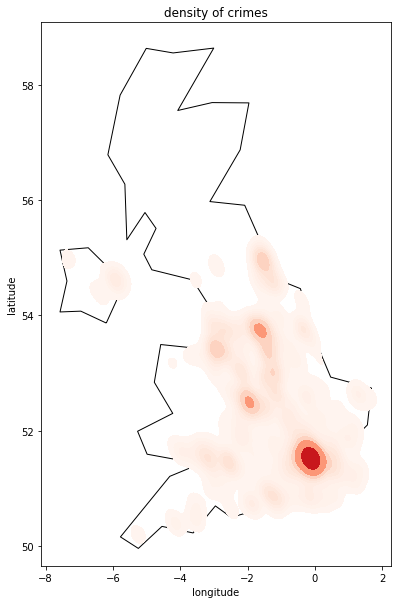

In [ ]:
import geopandas
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world[world.name == "United Kingdom"].plot(
    color='white', edgecolor='black',ax=ax)
sns.kdeplot(x=df.sample(frac=0.1)["longitude"], y=df.sample(frac=0.1)["latitude"],cmap="Reds", shade=True, bw_adjust=.5 ,ax=ax)
plt.title("density of crimes")
plt.show()


# Clusterisation

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python for Luca") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sparkDF=spark.createDataFrame(df[["longitude","latitude"]]) 
sparkDF

DataFrame[longitude: double, latitude: double]

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["longitude","latitude"],
    outputCol="features")

sp = assembler.transform(sparkDF)

In [ ]:

from pyspark.ml.clustering import BisectingKMeans
bkm = BisectingKMeans(k=6, minDivisibleClusterSize=1.0)

In [ ]:
model = bkm.fit(sp)


In [ ]:
sp_new=model.transform(sp)

In [ ]:
sp_new=sp_new.toPandas()

In [ ]:
sp_new


,longitude,latitude,features,prediction
0,-3.376110,51.117674,"[-3.37611, 51.117674]",0
1,-0.145107,51.515111,"[-0.145107, 51.515111]",4
2,0.352396,51.428458,"[0.352396, 51.428458]",4
3,-1.550117,54.527736,"[-1.550117, 54.527736]",2
4,-0.108868,51.562211,"[-0.108868, 51.562211]",4
...,...,...,...,...
620363,-3.052629,53.836939,"[-3.052629, 53.836939]",1
620364,-0.228465,51.312089,"[-0.228465, 51.312089]",4
620365,-3.834618,53.323126,"[-3.834618, 53.323126]",0
620366,-0.732479,51.509197,"[-0.732479, 51.509197]",3


In [ ]:
#elbow or silhoute score can be used as a metric

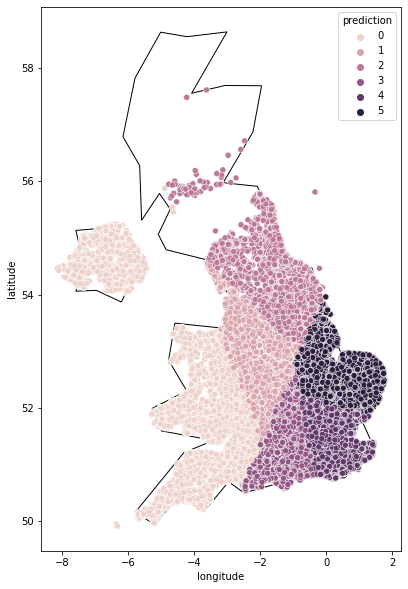

In [ ]:

fig = plt.figure(figsize=(15,10))
ax = plt.axes()

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


world[world.name == "United Kingdom"].plot(
    color='white', edgecolor='black',ax=ax)
sns.scatterplot(data=sp_new,x="longitude",y="latitude",hue=sp_new["prediction"],)

In [ ]:
sp_new["prediction"].value_counts()

4    195513
1    149760
2    104614
0     80222
3     57048
5     33211
Name: prediction, dtype: int64

In [ ]:
sp_new

,longitude,latitude,features,prediction
0,-3.376110,51.117674,"[-3.37611, 51.117674]",0
1,-0.145107,51.515111,"[-0.145107, 51.515111]",4
2,0.352396,51.428458,"[0.352396, 51.428458]",4
3,-1.550117,54.527736,"[-1.550117, 54.527736]",2
4,-0.108868,51.562211,"[-0.108868, 51.562211]",4
...,...,...,...,...
620363,-3.052629,53.836939,"[-3.052629, 53.836939]",1
620364,-0.228465,51.312089,"[-0.228465, 51.312089]",4
620365,-3.834618,53.323126,"[-3.834618, 53.323126]",0
620366,-0.732479,51.509197,"[-0.732479, 51.509197]",3


In [ ]:
df["cluster"]=sp_new.prediction

In [ ]:
df.columns

Index(['month_x', 'falls_within', 'longitude', 'latitude', 'location',
       'crime_type', 'year_month', 'near_station', 'year', 'month_y', 'tmax',
       'tmin', 'af', 'rain', 'sun', 'station', 'year_month_str', 'cluster'],
      dtype='object')

In [ ]:
df_train=df.drop(["falls_within",'longitude', 'latitude', 'location','year_month','near_station', 'year','station', 'year_month_str'],axis=1)

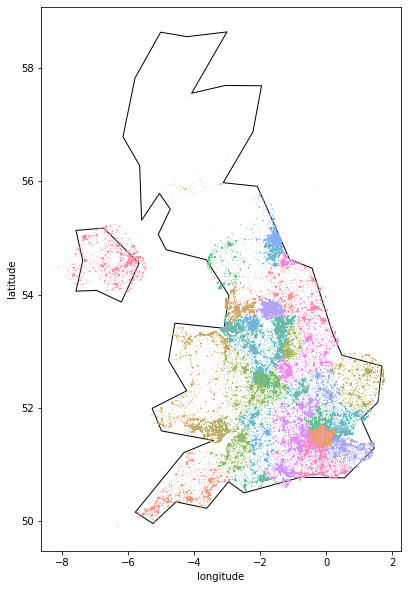

In [ ]:

fig = plt.figure(figsize=(15,10))
ax = plt.axes()

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world[world.name == "United Kingdom"].plot(
    color='white', edgecolor='black',ax=ax)
sns.scatterplot(data=df.sort_values(['longitude', 'latitude']),x="longitude",y="latitude",hue=df.sort_values(['longitude', 'latitude']).falls_within,s=0.3,legend=False)

In [ ]:
df.falls_within.value_counts()

Metropolitan Police Service           113043
West Yorkshire Police                  31634
West Midlands Police                   29526
Kent Police                            20899
Essex Police                           20208
Lancashire Constabulary                19986
Northumbria Police                     19616
Hampshire Constabulary                 18175
Thames Valley Police                   17381
South Yorkshire Police                 17268
Merseyside Police                      16891
Sussex Police                          16195
Police Service of Northern Ireland     15982
Avon and Somerset Constabulary         15609
South Wales Police                     14412
Nottinghamshire Police                 13876
West Mercia Police                     13001
Devon & Cornwall Police                12419
Derbyshire Constabulary                11934
Hertfordshire Constabulary             10602
Cheshire Constabulary                  10557
Humberside Police                      10326
Staffordsh

In [ ]:
df_count=df.groupby(["month_y","falls_within"]).count()["month_x"].reset_index()

In [ ]:
df_mean=df.groupby(["month_y","falls_within"]).mean()[["tmax",	"tmin",	"af",	"rain",	"sun"]].reset_index()

In [ ]:
df_train=df_count.merge(df_mean,on=["month_y","falls_within"])
del df_count,df_mean

In [ ]:
df_train

,month_y,falls_within,month_x,tmax,tmin,af,rain,sun
0,1.0,Avon and Somerset Constabulary,1373,9.399156,3.827553,5.330590,63.415348,38.673959
1,1.0,Bedfordshire Police,559,9.726118,4.400894,4.000000,48.422540,31.493739
2,1.0,British Transport Police,562,9.537809,4.171272,4.186699,52.587900,43.880751
3,1.0,Cambridgeshire Constabulary,654,9.103670,3.902446,3.981651,49.658716,0.526911
4,1.0,Cheshire Constabulary,886,9.167043,3.442099,3.832957,45.442664,43.686230
...,...,...,...,...,...,...,...,...
524,12.0,Warwickshire Police,435,8.915632,3.153180,7.373180,67.755287,43.836000
525,12.0,West Mercia Police,972,8.505681,2.328064,7.984797,71.377479,52.423549
526,12.0,West Midlands Police,2373,8.525179,2.408878,7.920705,68.600472,53.185179
527,12.0,West Yorkshire Police,2561,8.019446,2.958337,3.902772,73.722218,5.133620


output is number of accidents 


everything else is input

In [ ]:
df_train

,month_y,falls_within,month_x,tmax,tmin,af,rain,sun
0,1.0,Avon and Somerset Constabulary,1373,9.399156,3.827553,5.330590,63.415348,38.673959
1,1.0,Bedfordshire Police,559,9.726118,4.400894,4.000000,48.422540,31.493739
2,1.0,British Transport Police,562,9.537809,4.171272,4.186699,52.587900,43.880751
3,1.0,Cambridgeshire Constabulary,654,9.103670,3.902446,3.981651,49.658716,0.526911
4,1.0,Cheshire Constabulary,886,9.167043,3.442099,3.832957,45.442664,43.686230
...,...,...,...,...,...,...,...,...
524,12.0,Warwickshire Police,435,8.915632,3.153180,7.373180,67.755287,43.836000
525,12.0,West Mercia Police,972,8.505681,2.328064,7.984797,71.377479,52.423549
526,12.0,West Midlands Police,2373,8.525179,2.408878,7.920705,68.600472,53.185179
527,12.0,West Yorkshire Police,2561,8.019446,2.958337,3.902772,73.722218,5.133620


# ML

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR,SVR,NuSVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error

In [ ]:
X=df_train.drop(["month_x"],axis=1)
y=df_train[["month_x"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
numeric_features = ['month_y', 'tmax', 'tmin', 'af', 'rain', 'sun']
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = ["falls_within",]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
SVR = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearSVR( random_state=42))]
)


SVR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['month_y', 'tmax', 'tmin',
                                                   'af', 'rain', 'sun']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['falls_within'])])),
                ('classifier', LinearSVR(random_state=42))])

In [ ]:
SVR.score(X_test,y_test)

-0.29258941424511486

In [ ]:
mean_absolute_error(y_test,SVR.predict(X_test))

883.1771067581554

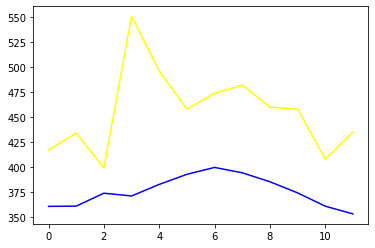

In [ ]:
plt.plot(SVR.predict(X[X["falls_within"]=="Warwickshire Police"]),c="blue")
plt.plot(y[X["falls_within"]=="Warwickshire Police"].reset_index(drop=True),c="yellow")

In [ ]:
y_test.reset_index(drop=True).loc[1:9]

,month_x
1,1343
2,792
3,587
4,1811
5,1424
6,84
7,503
8,1254
9,1442


In [ ]:
LR = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)


LR.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['month_y', 'tmax', 'tmin',
                                                   'af', 'rain', 'sun']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['falls_within'])])),
                ('classifier', LinearRegression())])

In [ ]:
LR.score(X_test,y_test)

0.985450228036851

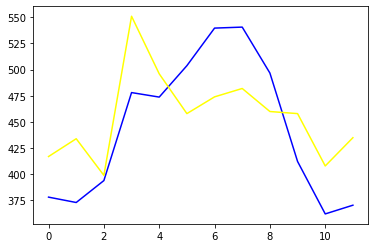

In [ ]:
plt.plot(LR.predict(X[X["falls_within"]=="Warwickshire Police"]),c="blue")
plt.plot(y[X["falls_within"]=="Warwickshire Police"].reset_index(drop=True),c="yellow")

In [ ]:
DTR = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeRegressor())]
)


DTR.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['month_y', 'tmax', 'tmin',
                                                   'af', 'rain', 'sun']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['falls_within'])])),
                ('classifier', DecisionTreeRegressor())])

In [ ]:
DTR.score(X_test,y_test)

0.9877446011993443

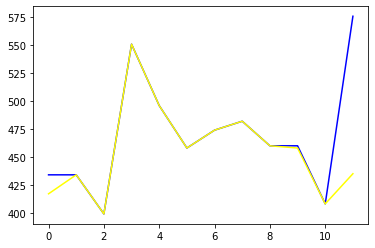

In [ ]:
plt.plot(DTR.predict(X[X["falls_within"]=="Warwickshire Police"]),c="blue")
plt.plot(y[X["falls_within"]=="Warwickshire Police"].reset_index(drop=True),c="yellow")

In [ ]:
model=Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",MLPRegressor(random_state=1, max_iter=10000,hidden_layer_sizes=32))]
)
model.fit(X_train, y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9870065885953023

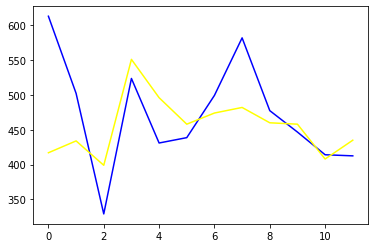

In [ ]:
plt.plot(model.predict(X[X["falls_within"]=="Warwickshire Police"]),c="blue")
plt.plot(y[X["falls_within"]=="Warwickshire Police"].reset_index(drop=True),c="yellow")

In [1]:
#todo make DL analysis